# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

https://github.com/ccaswell25/eds220-hwk3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datasets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Spills Data : 

**Description of the Data:** This dataset contains records of spills of petroleum and other hazardous materials in the state of New York.

**Date of Access:** 11-06-2023

**Link to Archive:** https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk


2022 County Data : 

**Description of the Data:** Shape file data for all counties in the US in 2022

**Date of Access:** 11-06-2023

**Link to Archive:** https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=Counties+%28and+equivalent%29


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

/tmp/ipykernel_2232820/1715165570.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_counties.rename(columns={'NAME': 'County'}, inplace=True) #Updating the county columns so they are the same


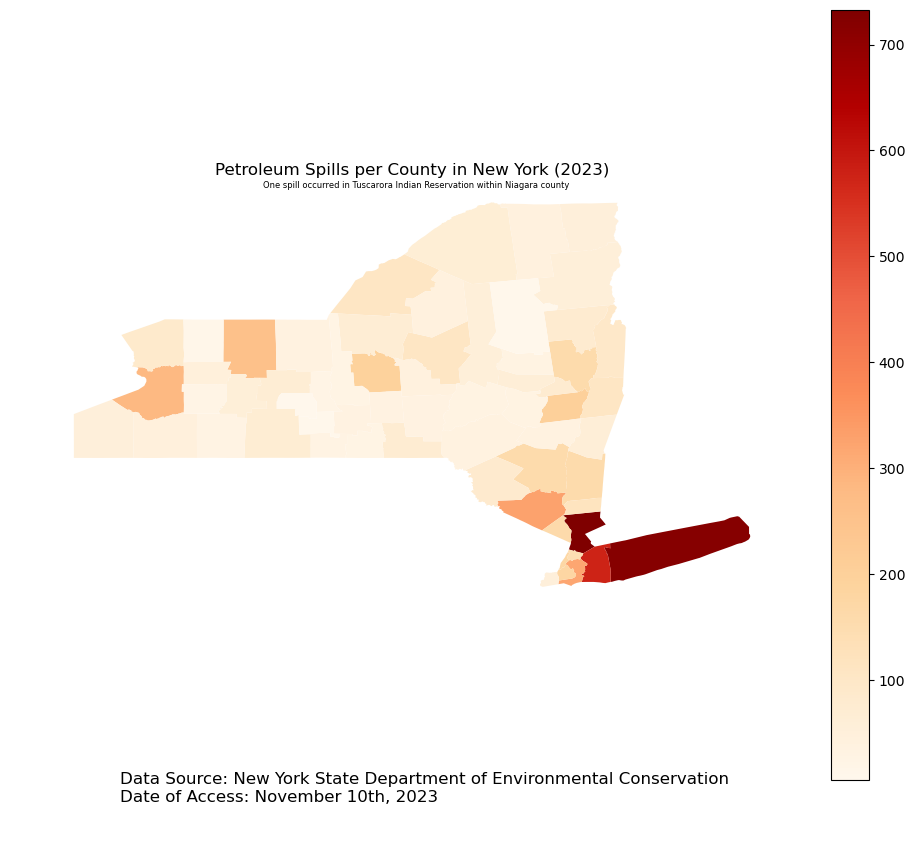

In [64]:
### My Final Code:
import pandas as pd #importing libraries
import geopandas as gpd #importing libraries
import matplotlib.pyplot as plt #importing libraries
import numpy as np #importing libraries
spills = pd.read_csv('data/Spill_Incidents_20231106.csv') # Importing NY spills data 
counties = gpd.read_file('data/tl_2022_uscounties/tl_2022_us_county.shp') # Importing the counties data
spills.columns = spills.columns.str.replace(' ', '') # Removing white space from columns
spills['SpillDate'] = pd.to_datetime(spills['SpillDate']) #Changing spill date to a datetime column
petr_23 = spills[ (spills.MaterialFamily == 'Petroleum') & (spills['SpillDate'] >= '01/01/2023') & (spills['SpillDate'] <= '10/31/2023')] #filtering the data to only have petroleum spills in 2023
spills_per_county = petr_23['County'].value_counts().reset_index() # Creating a new dataframe by resetting the index and counting the spills per county
spills_per_county.columns = ['County', 'n_spills'] #new dataframe with only the columns we need
counties.columns.str.lower() #simplifying column names for counties
ny_counties = counties[counties.STATEFP == '36'] #only getting counties for NY 
spills_per_county_counties = spills_per_county['County'].values #first getting just the values from the county columns
ny_counties_names = ny_counties['NAME'].values #first getting just the values from the county columns
county_difference = np.setdiff1d(spills_per_county_counties, ny_counties_names) #finding the columns that are different
st_lawrence_index = spills_per_county[spills_per_county.County=='St Lawrence'].index[0] #select the first item in that tuple using [0]
spills_per_county.at[st_lawrence_index, 'County'] = 'St. Lawrence' #updating the name St Lawrence
ny_counties.rename(columns={'NAME': 'County'}, inplace=True) #Updating the county columns so they are the same
ny_counties = pd.merge(spills_per_county, ny_counties, on='County', how='inner') #innerjoining the two datasets
niagara_county_index = ny_counties[ny_counties['County'] == 'Niagara'].index #finding Niagara county
ny_counties.loc[niagara_county_index, 'n_spills'] + 1 #adding one spill to niagara county
ny_counties = gpd.GeoDataFrame(ny_counties, #creating a new geo-dataframe of our merged datasets
                                geometry = 'geometry',
                               crs = "EPSG:2263")
fig, ax = plt.subplots(figsize=(12, 10))#Creating the canvas for our choropleth map
ny_counties.plot(column='n_spills', cmap='OrRd', linewidth=0.4, ax=ax, legend=True) # Use 'n_spills' as the column to visualize on the map
plt.title('Petroleum Spills per County in New York (2023)', fontsize=12)
plt.annotate('Data Source: New York State Department of Environmental Conservation\nDate of Access: November 10th, 2023', 
             xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', 
             verticalalignment='top', fontsize=12)
plt.annotate('One spill occurred in Tuscarora Indian Reservation within Niagara county', 
             xy=(0.3, 0.99),  xycoords='axes fraction', fontsize=6) #Setting title and annotations
ax.set_axis_off() #Removing the axis
plt.show() #Showing the map

<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# imported libraries:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
# Importing NY spills data 
spills = pd.read_csv('data/Spill_Incidents_20231106.csv')

# Importing the counties data
counties = gpd.read_file('data/tl_2022_uscounties/tl_2022_us_county.shp')

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [4]:
# 1. Checking the dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
# 2. Removing the white space:
spills.columns = spills.columns.str.replace(' ', '')
spills.columns

Index(['SpillNumber', 'ProgramFacilityName', 'Street1', 'Street2', 'Locality',
       'County', 'ZIPCode', 'SWISCode', 'DECRegion', 'SpillDate',
       'ReceivedDate', 'ContributingFactor', 'Waterbody', 'Source',
       'CloseDate', 'MaterialName', 'MaterialFamily', 'Quantity', 'Units',
       'Recovered'],
      dtype='object')

In [6]:
# 3. Checking the data types of columns:
spills.dtypes

SpillNumber              int64
ProgramFacilityName     object
Street1                 object
Street2                 object
Locality                object
County                  object
ZIPCode                 object
SWISCode                 int64
DECRegion                int64
SpillDate               object
ReceivedDate            object
ContributingFactor      object
Waterbody               object
Source                  object
CloseDate               object
MaterialName            object
MaterialFamily          object
Quantity               float64
Units                   object
Recovered              float64
dtype: object

In [7]:
# 4. Checking the unique values in the `material_family` column
spills.MaterialFamily.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
# 5.Checking the unique values in the `county` column
spills.County.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

In [9]:
#6. Checking the info on biggest county records:
spills.County.value_counts()

Westchester                       54345
Suffolk                           49886
Nassau                            43976
Queens                            29341
Erie                              24871
                                  ...  
Canada - Region 5                     1
Oil Springs Indian Reservation        1
Connecticut - Region 3 (T)            1
Connecticut - Region 4                1
Shinnecock Indian Reservation         1
Name: County, Length: 87, dtype: int64

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [10]:
# Data from 1/1/23 - 10/31/23
spills['SpillDate'] = pd.to_datetime(spills['SpillDate'])
petr_23 = spills[ (spills.MaterialFamily == 'Petroleum') & (spills['SpillDate'] >= '01/01/2023') & (spills['SpillDate'] <= '10/31/2023')]
petr_23 #checking the new dataset

,SpillNumber,ProgramFacilityName,Street1,Street2,Locality,County,ZIPCode,SWISCode,DECRegion,SpillDate,ReceivedDate,ContributingFactor,Waterbody,Source,CloseDate,MaterialName,MaterialFamily,Quantity,Units,Recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541791,2208600,ZHANG RESIDENCE,11 ACORN LANE,NaN,STONY BROOK,Suffolk,NaN,5222,1,2023-01-22,01/22/2023,Equipment Failure,NaN,Private Dwelling,01/31/2023,#2 fuel oil,Petroleum,5.0,Gallons,0.0
541794,2303072,ZHANG RESIDENCE,93 CHERRY LANE,NaN,HICKSVILLE,Nassau,NaN,3024,1,2023-07-14,07/14/2023,Equipment Failure,NaN,Private Dwelling,09/18/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0
541904,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,NaN,LARCHMONT,Westchester,NaN,6032,3,2023-01-10,01/10/2023,Equipment Failure,NaN,Private Dwelling,NaN,#2 fuel oil,Petroleum,0.0,NaN,0.0
542187,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,NaN,PELHAM,Westchester,NaN,6044,3,2023-05-16,05/16/2023,Equipment Failure,NaN,Private Dwelling,07/11/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [11]:
# Verifying new dataframe:
petr_23.MaterialFamily.unique()

#I can see that only Petroleum is the unique value in my dataframe

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [12]:
# Verifying we only have 2023 data: 
petr_23.SpillDate.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [13]:
# Verifying we only have data from January to October: 
petr_23.SpillDate.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [14]:
# Creating a new dataframe by reseting the index and counting the spills per county:
spills_per_county = petr_23['County'].value_counts().reset_index()
spills_per_county.columns = ['County', 'n_spills']
spills_per_county #double checking how it looks

,County,n_spills
0,Westchester,733
1,Suffolk,719
2,Nassau,574
3,Orange,329
4,Queens,320
...,...,...
59,Schuyler,11
60,Hamilton,9
61,New Jersey - Region 2,6
62,Yates,6


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [15]:
# 1. Checking the head of counties
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [16]:
# 2. Simplifying the column names
counties.columns.str.lower()

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'name', 'namelsad', 'lsad',
       'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat', 'aland',
       'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [17]:
# 3. Checking the data types of the columns
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [18]:
# 4. Checking the geo dataframe's CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

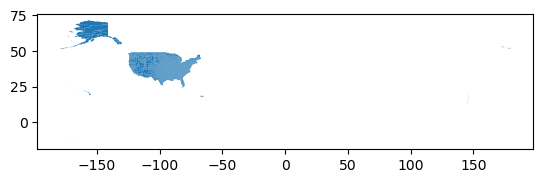

In [19]:
# 5. Plotting the geo-dataframe
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

In [20]:
# Only getting counties from NY:
ny_counties = counties[counties.STATEFP == '36']
ny_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
46,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,051,00974124,36051,Livingston,Livingston County,06,H1,G4020,None,None,None,A,1636254770,22005357,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580..."
2963,36,025,00974111,36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067..."
3157,36,071,00974134,36071,Orange,Orange County,06,H1,G4020,None,None,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603..."
3158,36,093,00974144,36093,Schenectady,Schenectady County,06,H1,G4020,None,None,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763..."


## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [21]:
# 1.Printing the unique ny counties
ny_counties.NAME.unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [22]:
# 2.Printing the unique spills dataframe counties
spills_per_county.County.unique()

array(['Westchester', 'Suffolk', 'Nassau', 'Orange', 'Queens', 'Erie',
       'Monroe', 'Albany', 'Onondaga', 'Kings', 'New York', 'Rockland',
       'Ulster', 'Saratoga', 'Dutchess', 'Bronx', 'Putnam', 'Jefferson',
       'Oneida', 'Rensselaer', 'Washington', 'Niagara', 'Sullivan',
       'Warren', 'Schenectady', 'Broome', 'Steuben', 'Oswego', 'Ontario',
       'St Lawrence', 'Montgomery', 'Columbia', 'Livingston', 'Essex',
       'Herkimer', 'Chautauqua', 'Richmond', 'Clinton', 'Genesee',
       'Cattaraugus', 'Franklin', 'Lewis', 'Madison', 'Delaware',
       'Greene', 'Wayne', 'Chenango', 'Tompkins', 'Cortland', 'Otsego',
       'Schoharie', 'Fulton', 'Chemung', 'Allegany', 'Tioga', 'Cayuga',
       'Seneca', 'Wyoming', 'Orleans', 'Schuyler', 'Hamilton',
       'New Jersey - Region 2', 'Yates', 'Tuscarora Indian Reservation'],
      dtype=object)

In [23]:
# 3.Finding the county names that are in spills_per_county, but not in ny_counties
#first getting just the values from the county columns:
spills_per_county_counties = spills_per_county['County'].values
ny_counties_names = ny_counties['NAME'].values

#then finding those that are different
county_difference = np.setdiff1d(spills_per_county_counties, ny_counties_names)
print(county_difference)

['New Jersey - Region 2' 'St Lawrence' 'Tuscarora Indian Reservation']


In [24]:
# 4.Finding the county names that are in ny_counties but not spills_per_county
county_difference2 = np.setdiff1d(ny_counties_names, spills_per_county_counties)
print(county_difference2)

['St. Lawrence']


In [25]:
# 5. Checking the # of spills in Tuscarora Indian Reservation
spills_per_county[spills_per_county['County'] == 'Tuscarora Indian Reservation']

,County,n_spills
63,Tuscarora Indian Reservation,1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [26]:
# 1. Checking spills_per_county St Lawrence row
spills_per_county[spills_per_county['County'] == 'Tuscarora Indian Reservation'] 

,County,n_spills
63,Tuscarora Indian Reservation,1


In [27]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.County=='St Lawrence'].index

Int64Index([29], dtype='int64')

In [28]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.County=='St Lawrence'].index[0]
st_lawrence_index

29

In [29]:
# 4. Updating St Lawrence name
spills_per_county.at[st_lawrence_index, 'County'] = 'St. Lawrence'

In [30]:
# 5. Checking it worked
spills_per_county.County.unique() #I can see St. Lawrence listed now instead of St Lawrence

array(['Westchester', 'Suffolk', 'Nassau', 'Orange', 'Queens', 'Erie',
       'Monroe', 'Albany', 'Onondaga', 'Kings', 'New York', 'Rockland',
       'Ulster', 'Saratoga', 'Dutchess', 'Bronx', 'Putnam', 'Jefferson',
       'Oneida', 'Rensselaer', 'Washington', 'Niagara', 'Sullivan',
       'Warren', 'Schenectady', 'Broome', 'Steuben', 'Oswego', 'Ontario',
       'St. Lawrence', 'Montgomery', 'Columbia', 'Livingston', 'Essex',
       'Herkimer', 'Chautauqua', 'Richmond', 'Clinton', 'Genesee',
       'Cattaraugus', 'Franklin', 'Lewis', 'Madison', 'Delaware',
       'Greene', 'Wayne', 'Chenango', 'Tompkins', 'Cortland', 'Otsego',
       'Schoharie', 'Fulton', 'Chemung', 'Allegany', 'Tioga', 'Cayuga',
       'Seneca', 'Wyoming', 'Orleans', 'Schuyler', 'Hamilton',
       'New Jersey - Region 2', 'Yates', 'Tuscarora Indian Reservation'],
      dtype=object)

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [35]:
# 1. Updating the county columns so they are the same
ny_counties.rename(columns={'NAME': 'County'}, inplace=True)
ny_counties.columns

/tmp/ipykernel_2232820/3530606821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_counties.rename(columns={'NAME': 'County'}, inplace=True)


Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'County', 'NAMELSAD',
       'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT',
       'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [36]:
# 2. Innerjoining the two dataframes:
ny_counties = pd.merge(spills_per_county, ny_counties, on='County', how='inner')

In [38]:
# Adding one spill to Niagara county:
niagara_county_index = ny_counties[ny_counties['County'] == 'Niagara'].index
ny_counties.loc[niagara_county_index, 'n_spills'] + 1


21    89
Name: n_spills, dtype: int64

## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

In [62]:
#creating a geodataframe for graphing:
ny_counties = gpd.GeoDataFrame(ny_counties, #data for geo-dataframe
                               geometry = 'geometry',
                               crs = "EPSG:2263")

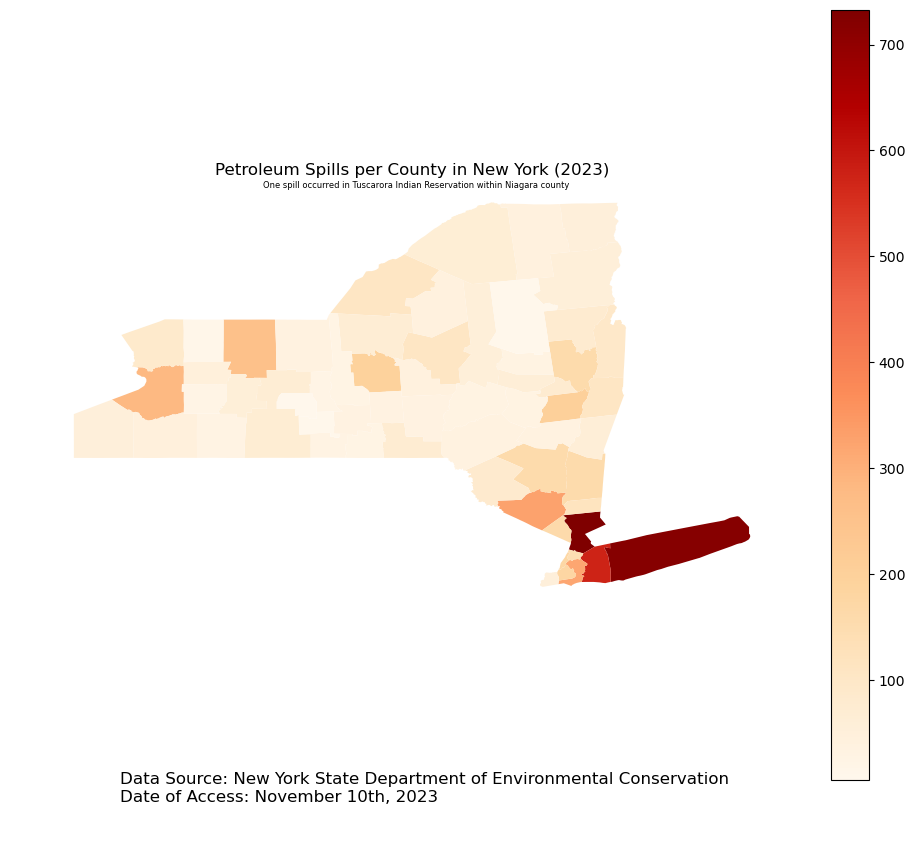

In [63]:
# Creating the canvas for our choropleth map
fig, ax = plt.subplots(figsize=(12, 10))

# Use 'n_spills' as the column to visualize on the map
ny_counties.plot(column='n_spills', cmap='OrRd', linewidth=0.4, ax=ax, legend=True)

# Setting title and annotations
plt.title('Petroleum Spills per County in New York (2023)', fontsize=12)
plt.annotate('Data Source: New York State Department of Environmental Conservation\nDate of Access: November 10th, 2023', 
             xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', 
             verticalalignment='top', fontsize=12)
plt.annotate('One spill occurred in Tuscarora Indian Reservation within Niagara county', 
             xy=(0.3, 0.99),  xycoords='axes fraction', fontsize=6)

# Remove axis
ax.set_axis_off()

# Show the map
plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.